## Feature Engineering & EDA Assignment
    Tram Duong
    APAN 5420
    September 14, 2020 
    
# UPDATE DATE

## Table of Contents:
* [Introduction](#intro)
* [Initial EDA](#initial_eda)
* [Feature 1](#feature1)
* [Feature 2](#feature2)
* [Feature 3](#feature3)
* [Feature 4](#feature4)
* [Feature 5](#feature5)
* [Feature 6](#feature6)
* [Feature 7](#feature7)
* [Feature 8](#feature8)
* [Feature 9](#feature9)
* [Feature 10](#feature10)
* [Feature 11](#feature11)
* [Feature 12](#feature12)
* [Feature 13](#feature13)
* [Feature 14](#feature14)
* [Feature 15](#feature15)
* [Feature 16](#feature16)
* [Feature 17](#feature17)
* [Feature 18](#feature18)
* [Feature 19](#feature19)
* [Feature 20](#feature20)

### Introduction <a class="anchor" id="intro"></a>

This dataset contains information on purchases made through the purchase card programs administered by the State of Oklahoma and higher education institutions. 

In this report, I will complete the following tasks.

- Create new features and conduct exploratory data analysis. 
- Each feature or discussion is a new lead. Structure your EDA for different leads with sub-sections. Each sub-section will cover the following:
    - Lead: Write what you are going to do in two to three sentences.
    - Analysis: your EDA
    - Conclusion: What is the business insight? How can this feature help prediction? Write a short conclusion in the end of each sub-section. 

#### Load Data and Libraries

In [1]:
#install.packages("plotly")
#install.packages("DataExplorer")
#install.packages("githubinstall")
#library(githubinstall)
#githubinstall("xda")

In [2]:
library(dplyr, quietly = TRUE)
library(DataExplorer, quietly = TRUE)
library(xda, quietly = TRUE)
library(ggplot2, quietly = TRUE)
library(plotly, quietly = TRUE)
library(lubridate, quietly = TRUE)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'DataExplorer' was built under R version 3.6.3"Warning message:
"package 'plotly' was built under R version 3.6.3"
Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



In [3]:
setwd("C:/github/Data-Science-Portfolio/Feature Engineering & ModelingDoc/")
ccard <- read.csv("res_purchase_card_(pcard)_fiscal_year_2014_3pcd-aiuu.csv")

In [4]:
colnames(ccard)

[1] "Year.Month"                   "Agency.Number"               
 [3] "Agency.Name"                  "Cardholder.Last.Name"        
 [5] "Cardholder.First.Initial"     "Description"                 
 [7] "Amount"                       "Vendor"                      
 [9] "Transaction.Date"             "Posted.Date"                 
[11] "Merchant.Category.Code..MCC."

In [5]:
colnames(ccard)<-c('Year_Month', 'Agency_Number', 'Agency_Name', 'Cardholder_Last_Name',
      'Cardholder_First_Initial', 'Description', 'Amount', 'Vendor', 'Transaction_Date',
      'Posted_Date', 'Merchant_Category')

In [6]:
nrow(ccard)
head(ccard)

[1] 442458

Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category
201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON
201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE CLASSIFIED
201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS"
201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRITING PAPER"
201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,GENERAL PURCHASE,394.28,KYOCERA DOCUMENT SOLUTION,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"OFFICE, PHOTOGRAPHIC, PHOTOCOPY, AND MICROFILM EQUIPMENT"


In [7]:
summary(ccard)

   Year_Month     Agency_Number  
 Min.   :201307   Min.   : 1000  
 1st Qu.:201309   1st Qu.: 1000  
 Median :201401   Median :47700  
 Mean   :201357   Mean   :42786  
 3rd Qu.:201404   3rd Qu.:76000  
 Max.   :201406   Max.   :98000  
                                 
                                Agency_Name    
 OKLAHOMA STATE UNIVERSITY            :115995  
 UNIVERSITY OF OKLAHOMA               : 76143  
 UNIV. OF OKLA. HEALTH SCIENCES CENTER: 58247  
 DEPARTMENT OF CORRECTIONS            : 22322  
 DEPARTMENT OF TOURISM AND RECREATION : 17232  
 DEPARTMENT OF TRANSPORTATION         : 15689  
 (Other)                              :136830  
               Cardholder_Last_Name Cardholder_First_Initial
 JOURNEY HOUSE TRAVEL INC: 10137    J      : 55031          
 UNIVERSITY AMERICAN     :  7219    G      : 42251          
 JOURNEY HOUSE TRAVEL    :  4693    D      : 38120          
 Heusel                  :  4212    M      : 35352          
 Hines                   :  3423    S  

### Exploratory Data Analysis (EDA) <a class="anchor" id="initial_eda"></a>

#### Visualization by Agency Name

I started by looking at the agency name and calculating the statistical values for each agency, then created visualizations for some important statistical values, such as mean, sum, min, max, etc.

In [8]:
# Create statistic tables by agency
stat_by_agency <- ccard %>% group_by(Agency_Name) %>%
    summarise(count = n(),
              amount = sum(Amount),
              mean = mean(Amount),
              min = min(Amount),
              max = max(Amount)
             ) %>%
    arrange(desc(amount)) %>% ungroup()

# Calculate the percentage of total values of transactions per agency
stat_by_agency <- stat_by_agency %>%
    mutate(row = rep(1:nrow(stat_by_agency)),
          Agency_Name_ind = paste(row,Agency_Name,sep="_"),
          percent = amount/sum(amount)) %>%
          arrange(desc(percent)) %>%
    select(Agency_Name_ind,count, amount, percent,mean, min, max)

The stat_by_agency shows the percent of total amount of transactions of each agency in descending order. 

In [9]:
head(stat_by_agency)

Agency_Name_ind,count,amount,percent,mean,min,max
1_OKLAHOMA STATE UNIVERSITY,115995,33778840,0.17963575,291.2094,-6266.53,27967.38
2_UNIVERSITY OF OKLAHOMA,76143,24886383,0.13234570,326.8374,-41740.00,114203.17
3_UNIV. OF OKLA. HEALTH SCIENCES CENTER,58247,24527325,0.13043623,421.0916,-7188.61,1903858.37
4_GRAND RIVER DAM AUTH.,10427,22213829,0.11813306,2130.4142,-9000.00,1089180.00
5_DEPARTMENT OF TRANSPORTATION,15689,14399262,0.07657522,917.7935,-34108.00,348053.75
6_DEPARTMENT OF CORRECTIONS,22322,13988872,0.07439277,626.6854,-20000.00,96190.38


In [10]:
# Subtract the table 
temp <-stat_by_agency[1:30,]

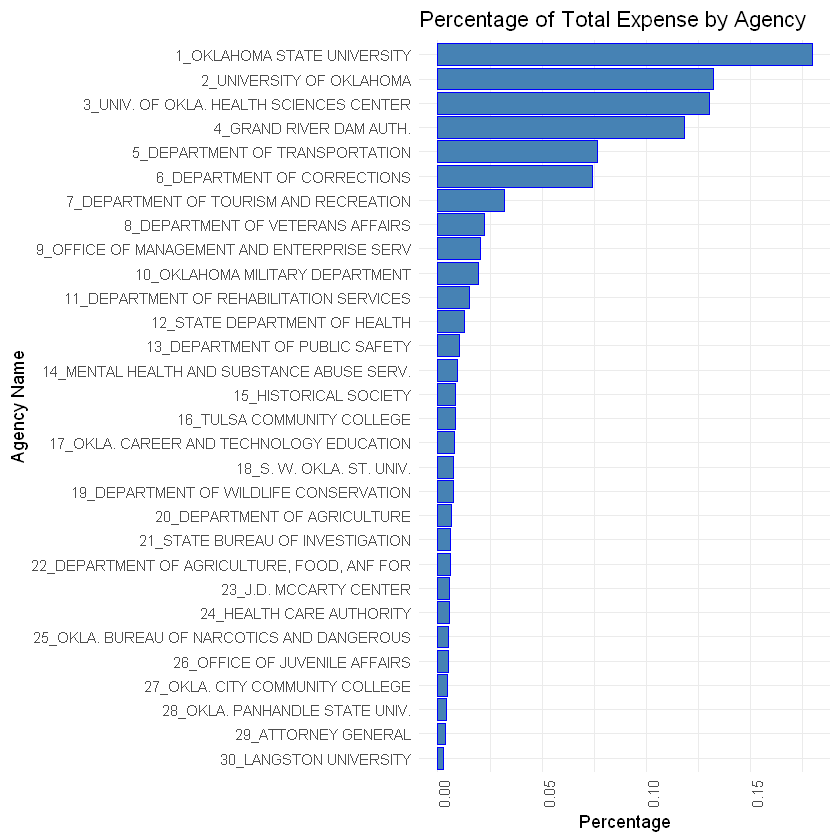

In [11]:
gg<- ggplot() + geom_bar(aes(reorder(temp$Agency_Name_ind,temp$percent),temp$percent), stat = 'identity',
                        color = "blue" , fill = "steelblue") + 
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) + labs(
    title = "Percentage of Total Expense by Agency",
    x = "Agency Name",
    y = "Percentage") 

gg + coord_flip()

#### Feature Selection & Engineering

The dataset contains of information of agency number, agency name, cardholder, purchase description, amount, vendor, transaction, merchant category. The variables we are going to use are:
- Agency_number: unique ID of each agency
- Agency_name: Name of agency
- Cardholder_Last_Name: Last name of cardholder under each business
- Cardholder.First.Initial: First initial name of cardholder under each business
- Description: Informaion of expense
- Amount: The amount spend for each transaction. 
- Vendor: The recipient of the expense  
- Transaction_date: The transaction's date
- Posted_date: The date that the transaction went through
- Merchant_Category: Expense category

**First Step: Data Preprocessing**
  - Setting format for Transaction_Date and Posted_Date variables.
  - Creating Time variable to see the duration from transaction date to post date for each transaction. 
  - Creating a month_yr variables.

In [12]:
time_by_agency <- ccard %>% group_by(Agency_Name) %>%
    mutate(Transaction_Date=as.Date(Transaction_Date,format="%m/%d/%Y %H:%M")) %>%
    mutate(Posted_Date=as.Date(Posted_Date,format="%m/%d/%Y %H:%M")) %>%
    arrange(Agency_Name,Transaction_Date, Posted_Date) %>%
    mutate(Time = Posted_Date-Transaction_Date)

# Adding month_yr column into the dataframe
time_by_agency$month_yr <- format(as.Date(time_by_agency$Transaction_Date), "%Y-%m")

time_by_agency[,c("Agency_Number","Agency_Name", "Transaction_Date","Posted_Date","Vendor","Merchant_Category",
                  "Description","Amount","Time", "month_yr")][,1:10]

Agency_Number,Agency_Name,Transaction_Date,Posted_Date,Vendor,Merchant_Category,Description,Amount,Time,month_yr
26500,`DEPARTMENT OF EDUCATION,2013-06-29,2013-07-01,FACEBK CK7ZD4WK52,ADVERTISING SERVICES,GENERAL PURCHASE,415.85,2 days,2013-06
26500,`DEPARTMENT OF EDUCATION,2013-07-01,2013-07-01,FACEBK MB2EF4WL52,ADVERTISING SERVICES,GENERAL PURCHASE,96.14,0 days,2013-07
26500,`DEPARTMENT OF EDUCATION,2013-07-01,2013-07-02,Amazon.com,BOOK STORES,Magna Cart Personal Hand T PCE,68.00,1 days,2013-07
26500,`DEPARTMENT OF EDUCATION,2013-07-03,2013-07-04,WAL-MART #2804,"GROCERY STORES,AND SUPERMARKETS",GENERAL PURCHASE,82.28,1 days,2013-07
26500,`DEPARTMENT OF EDUCATION,2013-07-03,2013-07-04,WAL-MART #2804,"GROCERY STORES,AND SUPERMARKETS",GENERAL PURCHASE,-2.58,1 days,2013-07
26500,`DEPARTMENT OF EDUCATION,2013-07-03,2013-07-04,TECH-LOCK INC,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,GENERAL PURCHASE,9.50,1 days,2013-07
26500,`DEPARTMENT OF EDUCATION,2013-07-03,2013-07-04,JOURNYHSE HUGHES,TRAVEL AGENCIES,GENERAL PURCHASE,25.00,1 days,2013-07
26500,`DEPARTMENT OF EDUCATION,2013-07-03,2013-07-04,JOURNYHSE KNIGHT,TRAVEL AGENCIES,GENERAL PURCHASE,25.00,1 days,2013-07
26500,`DEPARTMENT OF EDUCATION,2013-07-03,2013-07-04,JOURNYHSE HONEYSUCKL,TRAVEL AGENCIES,GENERAL PURCHASE,25.00,1 days,2013-07
26500,`DEPARTMENT OF EDUCATION,2013-07-03,2013-07-05,AMERICAN AI 0017289901645,AMERICAN AIRLINES,AIR TRAVEL,721.60,2 days,2013-07


### 1: Average amount charged per month by agency<a class="anchor" id="feature1"></a>

This feature will provide an estimation of the average amount spent per month for each agency. If there are any anomalies present, such as unusual high charges per month, it would be noticed and investigated further. 

In [13]:
mean_by_agency <- time_by_agency %>%
          group_by(Agency_Name, month_yr) %>%
          summarise(month_average = mean(Amount))

From the output result, we will be able to track the monthly payment of each agency, below is an example of using scatter chart to identify monthly spending

In [14]:
sample_1 <- mean_by_agency %>% filter(Agency_Name == "ATTORNEY GENERAL")

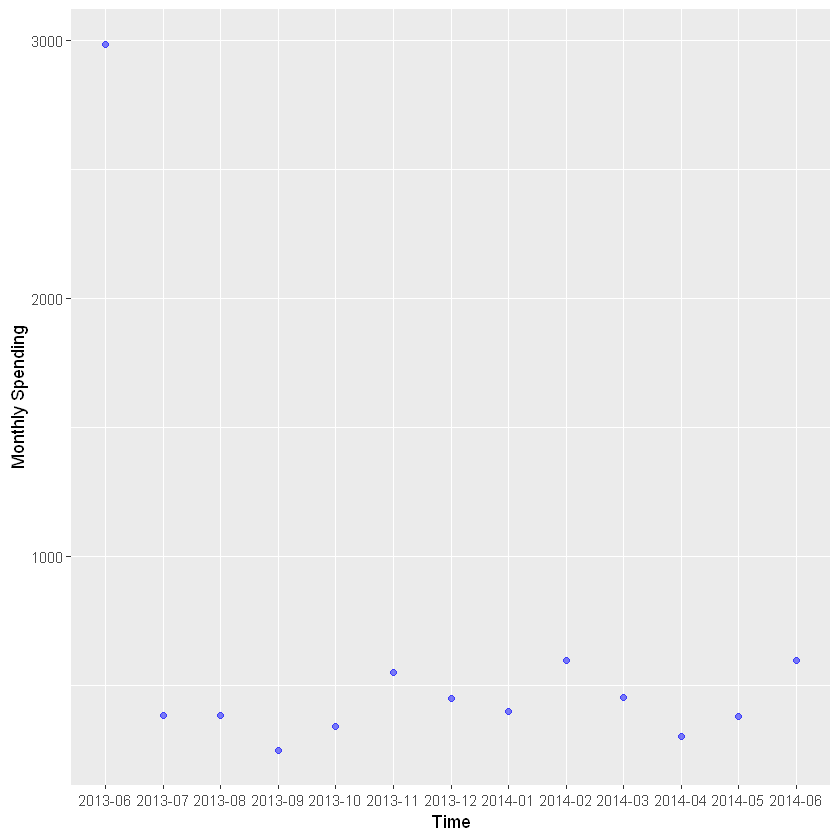

In [15]:
ggplot(sample_1, aes(x = month_yr , y = month_average)) +
        geom_point(alpha = 0.5 , size = 1.5, color = "blue", fill = "blue") + 
        labs(x = 'Time' , y = 'Monthly Spending')

**Conclusion**: The chart above shows that agency Attorney General made an unusually large payment in the month of June of 2013. However, their monthly spending after that seems very regular. Additionally, this feature shows that the agency payment would be predictable, such as decreasing spend every 3 months. This insight highlights the business use of this feature and shows how it will be helpful with detecting anomalies.

### 2: Total number of transactions per month by agency<a class="anchor" id="feature2"></a>

This feature helps detecting if an agency has made more transactions than they previously had, indicating potential of fraud. It filters by agency name and shows the number of transactions over time. 

In [16]:
count_by_agency  <- time_by_agency %>%
          group_by(Agency_Name, month_yr) %>%
          summarise(count = n())

In [17]:
sample_2 <- count_by_agency %>% filter(Agency_Name == "ATTORNEY GENERAL")
nrow(sample_2)

[1] 13

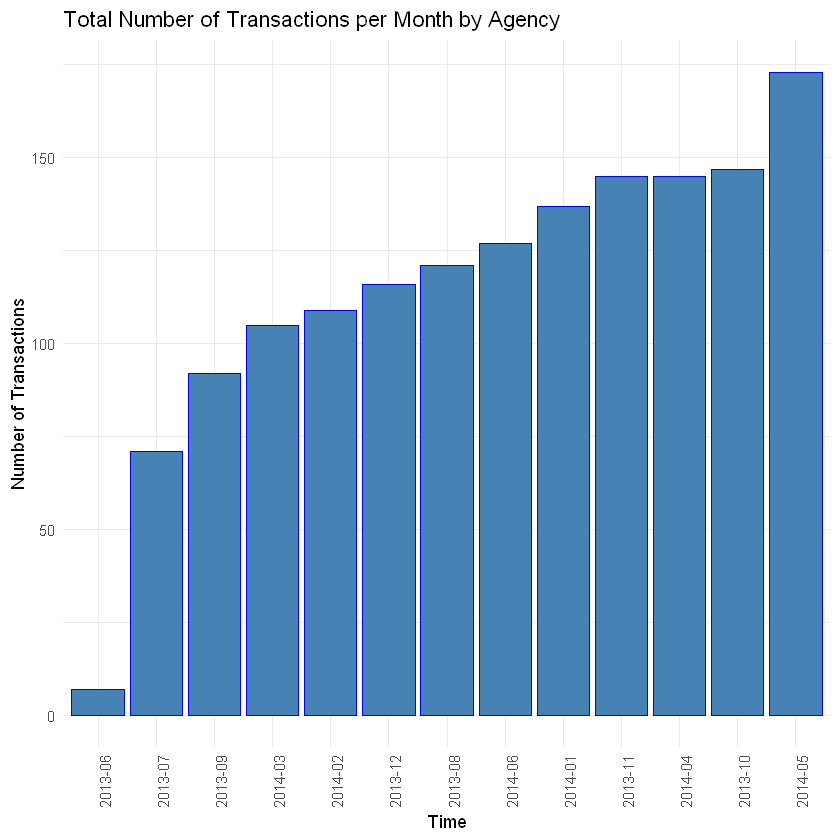

In [18]:
ggplot() + geom_bar(aes(reorder(sample_2$month_yr,sample_2$count),sample_2$count), stat = 'identity',
                    color = "blue", fill = "steelblue") + 
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) + labs(
    title = "Total Number of Transactions per Month by Agency",
    x = "Time",
    y = "Number of Transactions") 

**Conclusion**: Through the chart, it shows that there is an upward trend of transactions, which is likely to not be problematic. If there are sudden increases, it may predict the possibility of fraud and that further exploration is needed.

### 3: Average spending amount per transaction for each agency<a class="anchor" id="feature3"></a>
This feature shows the average amount spend in the transaction by an agency. It helps to show if there is a sudden increase compared to all agencies or if tracked monthly, shows how the transactions change.

In [19]:
# Sort and subtract mean value in descending order
mean_data <- ccard %>% group_by(Agency_Name) %>%
    summarise(mean_amount = mean(Amount)) %>%
    arrange(desc(mean_amount)) %>% ungroup() 
# Subtract top-30 highest mean values
sample_3 <- mean_data[1:15,]

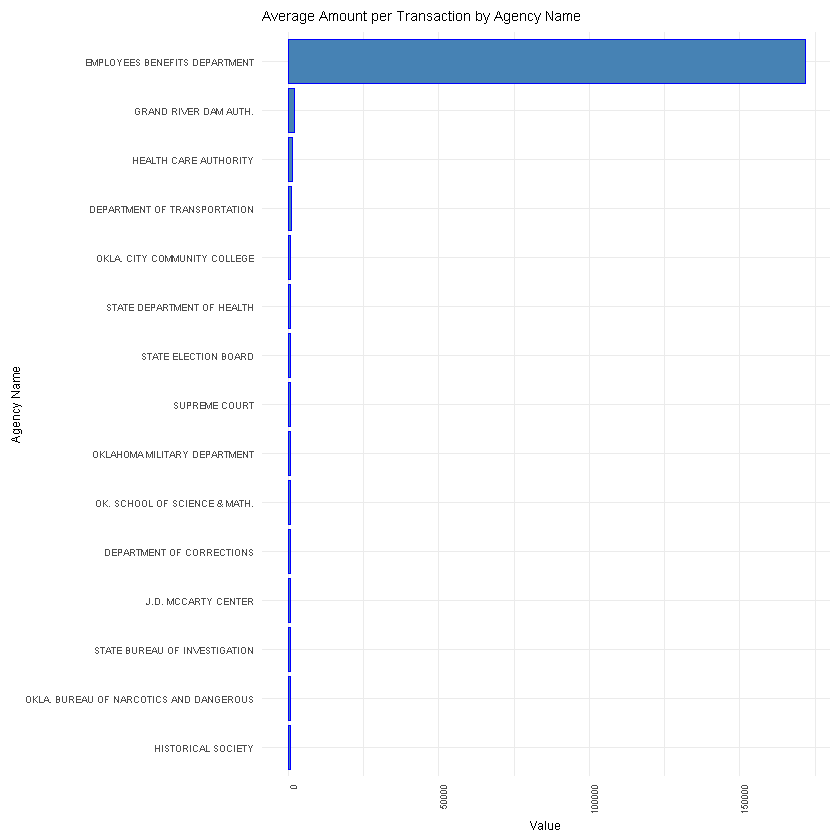

In [20]:
gg2 <- ggplot() + geom_bar(aes(reorder(sample_3$Agency_Name,sample_3$mean_amount),sample_3$mean_amount), stat = 'identity',
                           color = "blue", fill = "steelblue") + 
  theme_minimal() + 
  theme(text = element_text(size=7),
    axis.text.x = element_text(angle = 90, hjust = 1)) + labs(
    title = "Average Amount per Transaction by Agency Name",
    x = "Agency Name",
    y = "Value")
gg2 + coord_flip()

In [21]:
emp_bene <- time_by_agency %>% filter(Agency_Name == "EMPLOYEES BENEFITS DEPARTMENT") %>% group_by(Vendor,Merchant_Category)
emp_bene

Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Time,month_yr
201307,81500,EMPLOYEES BENEFITS DEPARTMENT,81500,8,GENERAL PURCHASE,343148.50,PAYMENT ADJUSTMENT,2013-06-13,2013-07-03,OTHER FEES,20 days,2013-06
201307,81500,EMPLOYEES BENEFITS DEPARTMENT,81500,8,GENERAL PURCHASE,90.72,CBR MAN CK,2013-07-08,2013-07-09,OTHER FEES,1 days,2013-07


***Conclusion***: This feature shows an average amount of spending per transaction and the chart above shows that Employees Benefits Department has extremely high average spending per transaction, which would need to be investigated further. Additionally, we could use this feature to make comparsons for upcoming monthly expenses by agency.

In this case, the agency only made 2 transactions, which are both in 2013 while the data is up to June, 2014. The agency has not used the card for almost a year and the amounts of these transactions are odd. 

### 4: The average amount spent per day every month <a class="anchor" id="feature4"></a>

This feature helps to show how much an agency spends per day each month. If there is a increase of the average expenses, it indicates that something has changed and should be investigated. 

In [22]:
daily_by_agency <- time_by_agency %>%
          group_by(Agency_Name, month_yr) %>%
          summarise(daily_amount = sum(Amount)/30)

In [23]:
# Example of using the 
sample_4 <- daily_by_agency%>% filter(Agency_Name == "ATTORNEY GENERAL") 

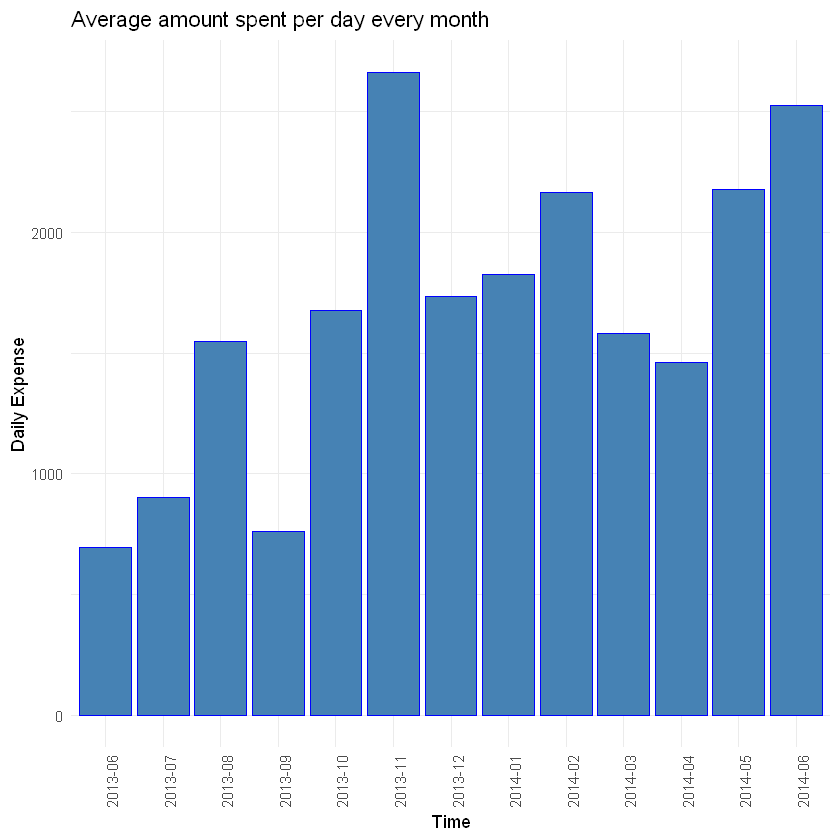

In [24]:
gg4 <- ggplot() + geom_bar(aes(sample_4$month_yr,sample_4$daily_amount), 
                           stat = 'identity',color = "blue", fill = "steelblue") + 
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) + labs(
    title = "Average amount spent per day every month",
    x = "Time",
    y = "Daily Expense") 

gg4

***Conclusion***: As shown in the graph, there is a sudden increase that indicates a change in normal behaviour for this agency. If the feature is monitored, it can help predict if anomalies are present.

### 5: Total number of transactions with the same vendor during the past 30 days/per month <a class="anchor" id="feature5"></a>

This feature shows how often an agency makes transaction with vendors. It takes the transactions over the past 30 days and compares how many transactions are made per vendor.

In [25]:
count_by_agency_vendor <- time_by_agency %>% group_by(Agency_Name, Vendor, month_yr) %>%
    summarise(count_amt = n()) %>%
    arrange(desc(count_amt)) %>% ungroup() 

In [26]:
# 2014-06 is the lastest month in the dataset
sample_5 <- count_by_agency_vendor%>% filter(Agency_Name == "ATTORNEY GENERAL", month_yr == "2014-06" ) 
nrow(sample_5)

[1] 82

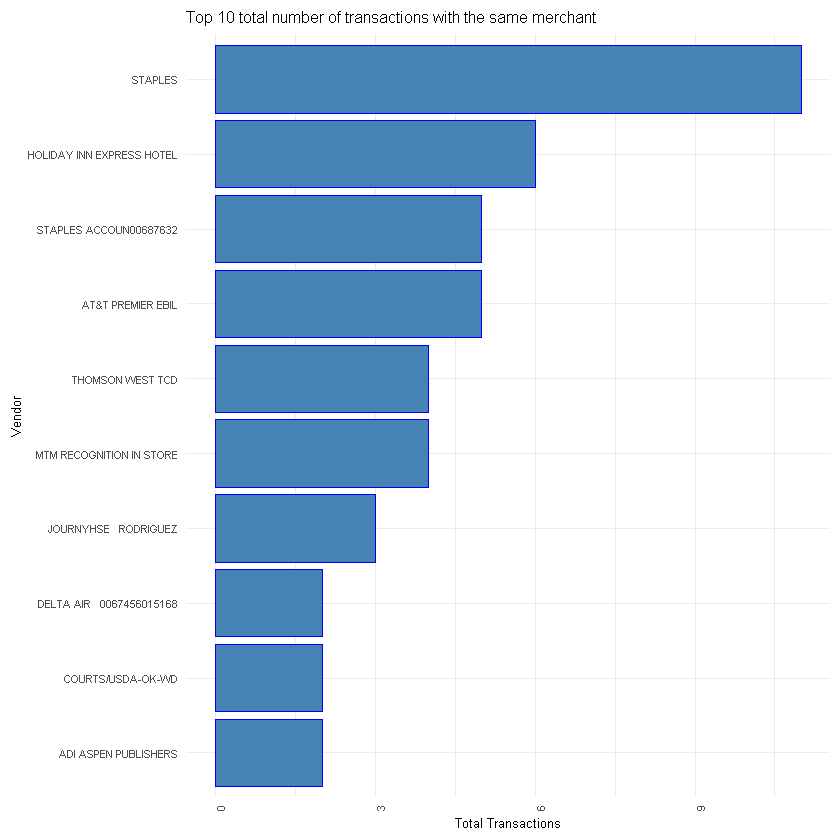

In [27]:
# Top 10 total number of transactions with the same merchant in the past 30 days
sample_5 <- sample_5[1:10,]

gg5 <- ggplot() + geom_bar(aes(reorder(sample_5$Vendor,sample_5$count_amt),sample_5$count_amt), stat = 'identity',
                          color = "blue", fill = "steelblue") + 
  theme_minimal() + 
  theme(text = element_text(size=8),
        axis.text.x = element_text(angle = 90, hjust = 1)) + 
  labs(title = "Top 10 total number of transactions with the same merchant",
        x = "Vendor",
        y = "Total Transactions")
gg5 +coord_flip()

***Conclusion*** : As shown in the graph, this agency has the highest number of transactions with Staples. If this figure was tracked on a moving average basis, it can help determine if there is a change in the frequency of transaction to help predict anomalies if there is a change.

### 6: Average Amount per day spent on the same vendor during the last 30 days <a class="anchor" id="feature6"></a>

This feature looks at the transactions an agency makes over the last 30 days and tracks the average amount spent per day. It looks at a single month for a single agency, but can be expanded to track the amounts across all agencies.

In [28]:
mean_by_agency_vendor <- time_by_agency %>% group_by(Agency_Name, Vendor, month_yr) %>%
    summarise(mean_vendor = mean(Amount)) %>%
    arrange(desc(mean_vendor)) %>% ungroup() 

In [29]:
# 2014-06 is the lastest month in the dataset
sample_6 <- mean_by_agency_vendor%>% filter(Agency_Name == "ATTORNEY GENERAL", month_yr == "2014-06" ) 
nrow(sample_6)

[1] 82

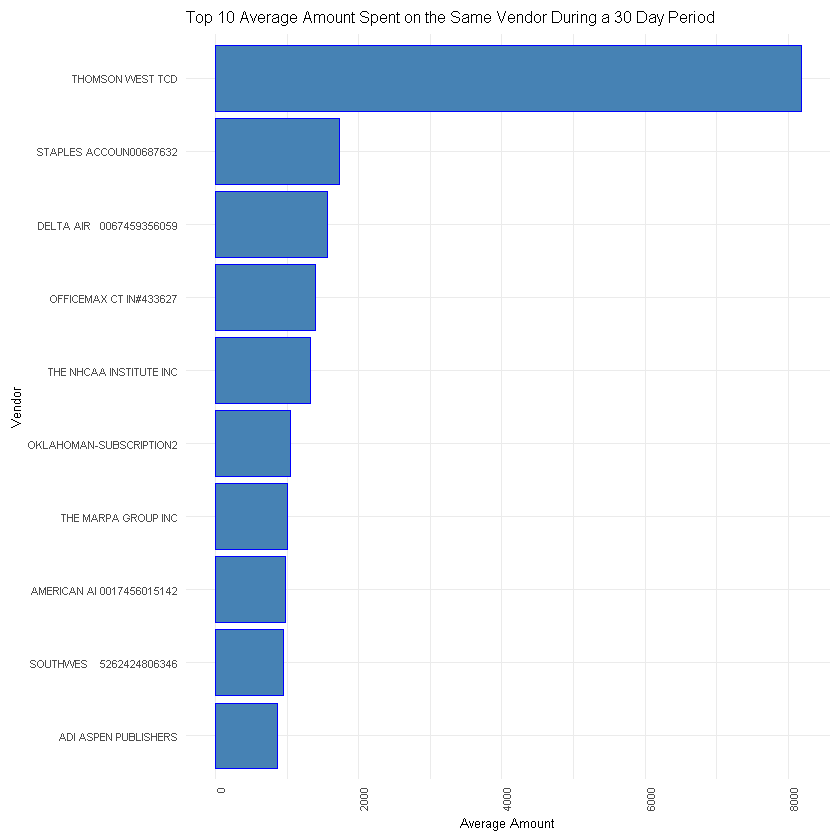

In [30]:
# Top 10 total number of transactions with the same merchant in the past 30 days
sample_6 <- sample_6[1:10,]

gg6 <- ggplot() + geom_bar(aes(reorder(sample_6$Vendor,sample_6$mean_vendor),sample_6$mean_vendor),
                           stat = 'identity',color = "blue", fill = "steelblue") + 
  theme_minimal() + 
  theme(text = element_text(size=8),
        axis.text.x = element_text(angle = 90, hjust = 1)) + 
  labs(title = "Top 10 Average Amount Spent on the Same Vendor During a 30 Day Period",
        x = "Vendor",
        y = "Average Amount")
gg6 +coord_flip()

***Insights*** :The feature shows that the agency, ATTORNEY GENERAL, spent over $800 on Thomsom West, almost 4 times than the second ranked average amount spending in June 2014. This amount may possibly not be abnormal if its similar for other months, but would require further investigation. 

This feature helps to identify the average amount spent per month with different vendor and would help to keep track if there is any irregular amount spent on these vendors. If there is a sudden increase, it can help predict if anomalies are present. 

### 7: Total number of transactions with the same merchant category <a class="anchor" id="feature7"></a>
This feature counts the number of transactions an agency has per merchant category. It looks at a single agency at a time and sums the amount within each category.

In [31]:
count_by_agency_merchant <- ccard %>% group_by(Agency_Name, Merchant_Category) %>%
    summarise(count_amount = n()) %>%
    arrange(desc(count_amount)) %>% ungroup() 

In [32]:
sample_7 <- count_by_agency_merchant%>% filter(Agency_Name == "ARDMORE HIGHER EDUCATION CENTER")
nrow(sample_7)

[1] 18

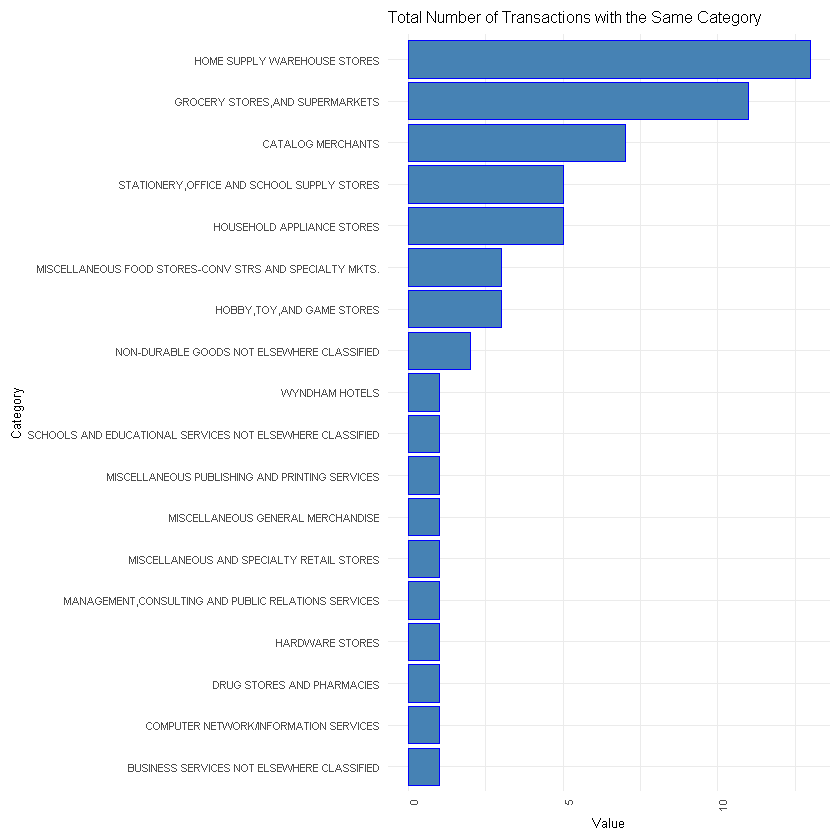

In [33]:
# Visualize the top 20 most spending merchant category for one agency
gg7 <- ggplot() + geom_bar(aes(reorder(sample_7$Merchant_Category,sample_7$count_amount),sample_7$count_amount),
                           stat = 'identity',color = "blue", fill = "steelblue") + 
  theme_minimal() + 
  theme(text = element_text(size=8),
      axis.text.x = element_text(angle = 90, hjust = 1)) + 
  labs(title = "Total Number of Transactions with the Same Category",
        x = "Category",
        y = "Value")
gg7 + coord_flip()

***Conclusion***: The above graph shows the amount of transactions an agency has within a certain category. If monitored over time, it can show if there is a sudden increase for a category, indicating a possible issue. This feature helps in predicting anomalies by showing what an agency typically spends on by category and notices if there is change that should be investigated. 

### 8: The Average Amount Spent on the Same Merchant  Category<a class="anchor" id="feature8"></a>
This feature looks at the average amount that is spent by an agency for a merchant category. It looks at the amount that is spent to compare changes that occur over time.

In [34]:
mean_by_agency_merchant <- ccard %>% group_by(Agency_Name, Merchant_Category) %>%
    summarise(mean_amount = mean(Amount)) %>%
    arrange(desc(mean_amount)) %>% ungroup() 

In [35]:
sample_8 <- mean_by_agency_merchant%>% filter(Agency_Name == "ARDMORE HIGHER EDUCATION CENTER")

Warning message:
"Removed 2 rows containing missing values (position_stack)."

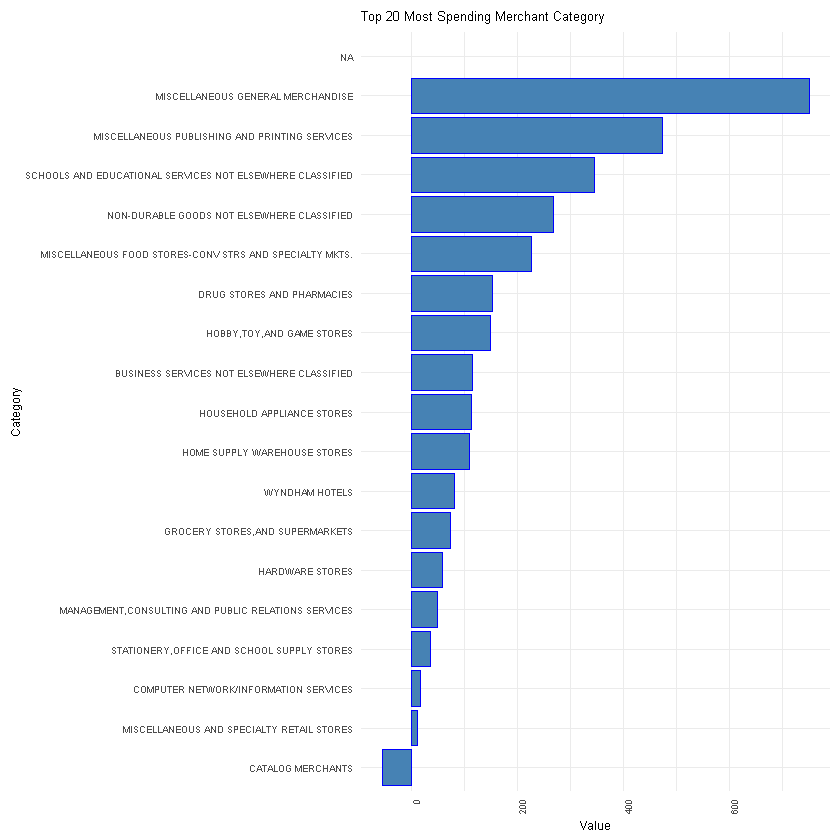

In [36]:
# Visualize the top 20 most spending merchant category for one agency
sample_8 <- sample_8[1:20,]

gg8 <- ggplot() + geom_bar(aes(reorder(sample_8$Merchant_Category,sample_8$mean_amount),sample_8$mean_amount),
                           stat = 'identity', color = "blue", fill = "steelblue") + 
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) + 
  labs(title = "Top 20 Most Spending Merchant Category",
        x = "Category",
        y = "Value")+
  theme(plot.title = element_text(size = 8),
        text = element_text(size=7))

gg8 + coord_flip()

***Conclusion***: This feature helps to indicate what is a typical charge for an agency based on historical data. If future charges suddenly are higher than average, it helps to predict fraud by highlighting transactions that are much higher than what is expected. Through showing transactions that are higher, it can indicate issues which should be investigated.

### 9: Percentage of expenses by merchant category for an agency <a class="anchor" id="feature9"></a>
This feature takes transactions from a single agency and finds the percent of expenses by a category. It first makes a subset to find the sum of all transactions to determine what the percent transactions there are by category.

In [37]:
# Change Agency_Name to explore different organizations
sample_9 <- ccard%>%filter(Agency_Name == "UNIVERSITY OF OKLAHOMA")
nrow(sample_9)

[1] 76143

In [38]:
sum_by_agency_merchant <- sample_9 %>% group_by(Agency_Name, Merchant_Category) %>%
    summarise(total = sum(Amount)) %>%
    arrange(desc(total))%>% ungroup() 

In [39]:
percent_by_agency_merchant <- sum_by_agency_merchant %>%
    mutate(row = rep(1:nrow(sum_by_agency_merchant)),
          percent = total/sum(total)*100) %>%
          arrange(desc(percent)) %>%
    select(Agency_Name,Merchant_Category,total, percent)

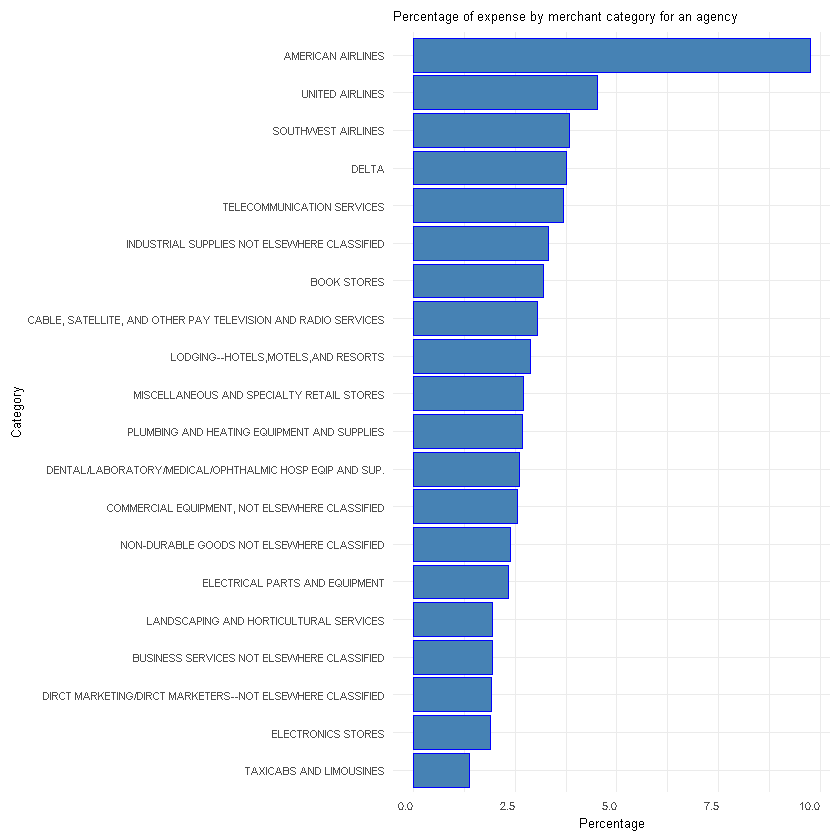

In [40]:
# Visualize the top 20 highest percentage of expense by merchant category for an agency
percent_by_agency_merchant <- percent_by_agency_merchant[1:20,]

gg9 <- ggplot() + geom_bar(aes(reorder(percent_by_agency_merchant$Merchant_Category,
                                       percent_by_agency_merchant$percent),
                                       percent_by_agency_merchant$percent),
                           stat = 'identity',color = "blue", fill = "steelblue") + 
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 1, hjust = 1)) + 
  labs(title = "Percentage of expense by merchant category for an agency",
        x = "Category",
        y = "Percentage")+
  theme(plot.title = element_text(size = 8),
        text = element_text(size=8))

gg9 + coord_flip()

***Conclusion***: This feature highlights what an agency typically spends their money on and gives a percentage by category. Through monitoring it over time, it can predict if there is unusual activity if the percentage quickly changes.

### 10: Percentage of Expense by Vendor for an Agency <a class="anchor" id="feature10"></a>
This feature takes a sample from a single agency and groups their expenses by vendors. It then divides this number by the total transactions to find the percentage of dollars it spends at that vendor.

In [41]:
# Change Agency_Name to explore different organizations
sample_10 <- ccard%>%filter(Agency_Name == "ATTORNEY GENERAL")
nrow(sample_10)

[1] 1495

In [42]:
sum_by_agency_vendor <- sample_10 %>% group_by(Agency_Name, Vendor) %>%
    summarise(total = sum(Amount)) %>%
    arrange(desc(total))%>% ungroup() 

In [43]:
percent_by_agency_vendor <- sum_by_agency_vendor %>%
    mutate(row = rep(1:nrow(sum_by_agency_vendor)),
          percent = total/sum(total)*100) %>%
          arrange(desc(percent)) %>%
    select(Agency_Name,Vendor,total, percent)

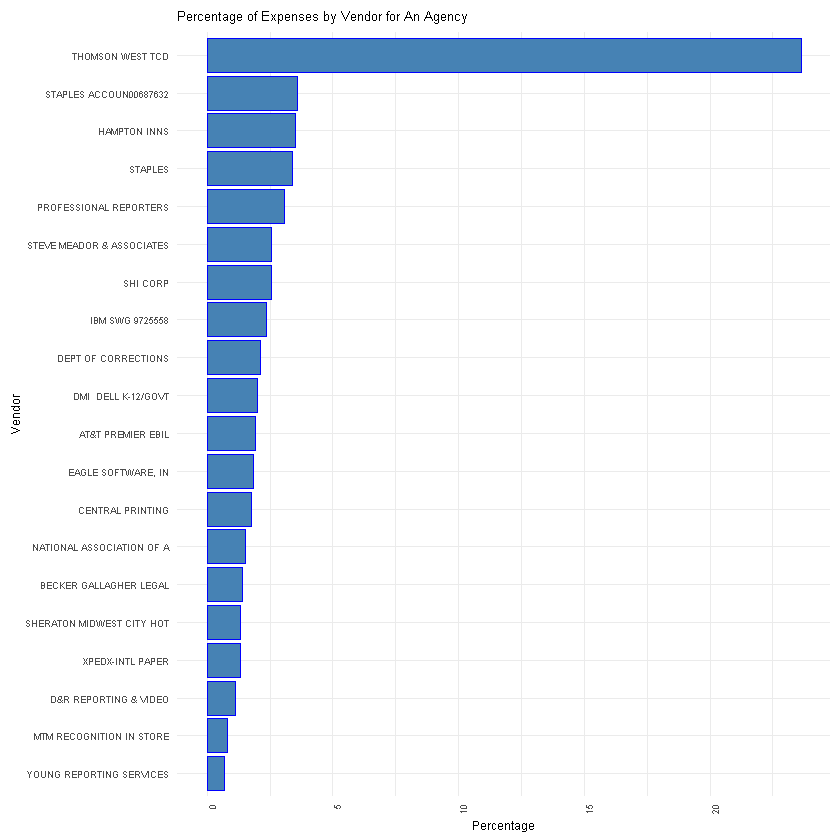

In [44]:
# Visualize the top 20 highest percentage of expense by vendor for an agency
percent_by_agency_vendor <- percent_by_agency_vendor[1:20,]

gg10 <- ggplot() + geom_bar(aes(reorder(percent_by_agency_vendor$Vendor,
                                        percent_by_agency_vendor$percent),
                                percent_by_agency_vendor$percent),
                            stat = 'identity',color = "blue", fill = "steelblue") + 
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) + 
  labs(title = "Percentage of Expenses by Vendor for An Agency",
        x = "Vendor",
        y = "Percentage")+
  theme(plot.title = element_text(size = 8),
        text = element_text(size=7))

gg10 + coord_flip()

***Conclusion***: The above graph creates a representation of where this agency spends their money. If this figure was tracked over time, it can help to predict if anything unusual is happening by comparing the change in percentages. Although new vendors may alter this list, it provides an idea of where their money is typically spent which can be further categorized for increased accuracy.

### 11: Total number of transactions with the same vendor during the past 3 months<a class="anchor" id="feature11"></a>
This feature takes the transaction from the latest 3 months of the dataset and then counts the number of transactions each agency has with all of their vendors. It then filters down the dataset to a single agency to compare their transactions with vendors. 

In [45]:
total_by_agency_vendor <- time_by_agency %>% group_by(Agency_Name, Vendor) %>%
    # lastest month in the dataset is 2014-06
    filter(month_yr >= "2014-04")%>%
    summarise(total_trans = n()) %>%
    arrange(desc(total_trans)) %>% ungroup() 

In [46]:
# Change Agency_Name to explore different organizations
sample_11 <- total_by_agency_vendor%>%filter(Agency_Name == "ATTORNEY GENERAL")
nrow(sample_11)

[1] 215

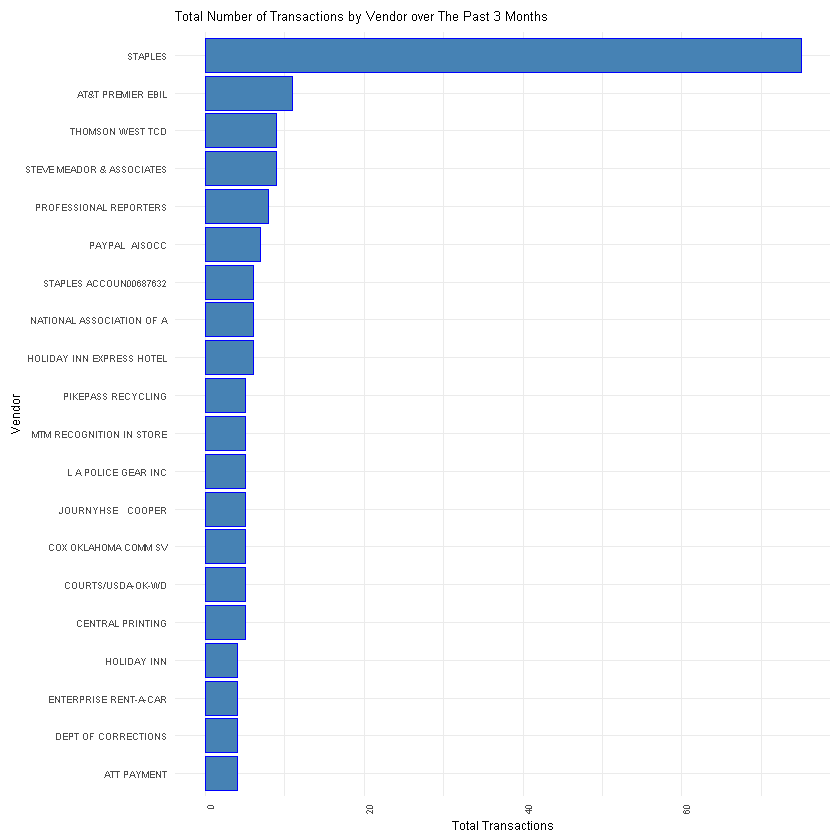

In [47]:
# Visualize the top 20 most spending merchant category for one agency
sample_11 <- sample_11[1:20,]

gg11 <- ggplot() + geom_bar(aes(reorder(sample_11$Vendor,sample_11$total_trans),sample_11$total_trans),
                            stat = 'identity',color = "blue", fill = "steelblue") + 
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) + 
  labs(title = "Total Number of Transactions by Vendor over The Past 3 Months",
        x = "Vendor",
        y = "Total Transactions")+
  theme(plot.title = element_text(size = 8),
        text = element_text(size=7))

gg11 + coord_flip()

***Conclusion:*** This feature helps to identify who an agency typically makes transactions with. These numbers can then be tracked over time to predict if any changes may indicate the presence of anomalies. 

### 12: Maximum Amount Spent by Vendor over a 30 Day Period<a class="anchor" id="feature12"></a>

This feature helps to identify any unsually large each month to vendors. It groups the amounts by agency and vendor to apply a filter based on month. It then aggregrates all transactions to find the max before filtering it by agency.

In [48]:
max_by_agency_vendor <- time_by_agency %>% group_by(Agency_Name, Vendor) %>%
    # lastest month in the dataset is 2014-06
    filter(month_yr == "2014-06")%>%
    summarise(max_trans = max(Amount)) %>%
    arrange(desc(max_trans)) %>% ungroup() 

In [49]:
# Change Agency_Name to explore different organizations
sample_12 <- max_by_agency_vendor%>%filter(Agency_Name == "ATTORNEY GENERAL")
nrow(sample_12)

[1] 82

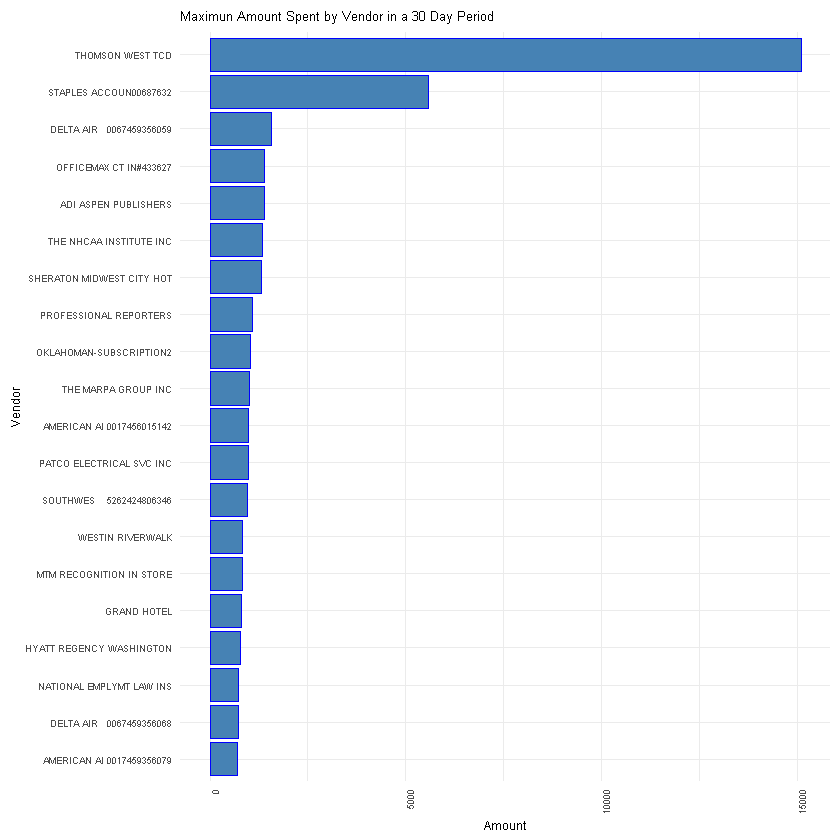

In [50]:
# Total Number of Transactions by Vendor over The Past 3 Months
sample_12 <- sample_12[1:20,]

gg12 <- ggplot() + geom_bar(aes(reorder(sample_12$Vendor,sample_12$max_trans),sample_12$max_trans),
                            stat = 'identity',color = "blue", fill = "steelblue") + 
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) + 
  labs(title = "Maximun Amount Spent by Vendor in a 30 Day Period",
        x = "Vendor",
        y = "Amount")+
  theme(plot.title = element_text(size = 8),
        text = element_text(size=7))

gg12 + coord_flip()

***Conclusion:*** Through tracking this feature, any changes in spending can be noticed. If these amounts differ greatly over time, it can help to predict if there is suspicious behaviour which should be investigated further.

### 13: Maximum Amount Spent by Merchant Category in a 30 Day Period<a class="anchor" id="feature13"></a>
This feature is similar to feature 12, but it groups by merchant category instead of vendor to provide a broader idea of what an agency is spending money on. It filters the transactions by month before summing them to find the max for a 30 day period.

In [51]:
max_by_agency_mer <- time_by_agency %>% group_by(Agency_Name, Merchant_Category) %>%
    # lastest month in the dataset is 2014-06
    filter(month_yr == "2014-06")%>%
    summarise(max_trans_mer = max(Amount)) %>%
    arrange(desc(max_trans_mer)) %>% ungroup() 

In [52]:
# Change Agency_Name to explore different organizations
sample_13 <- max_by_agency_mer%>%filter(Agency_Name == "ATTORNEY GENERAL")
nrow(sample_13)

[1] 31

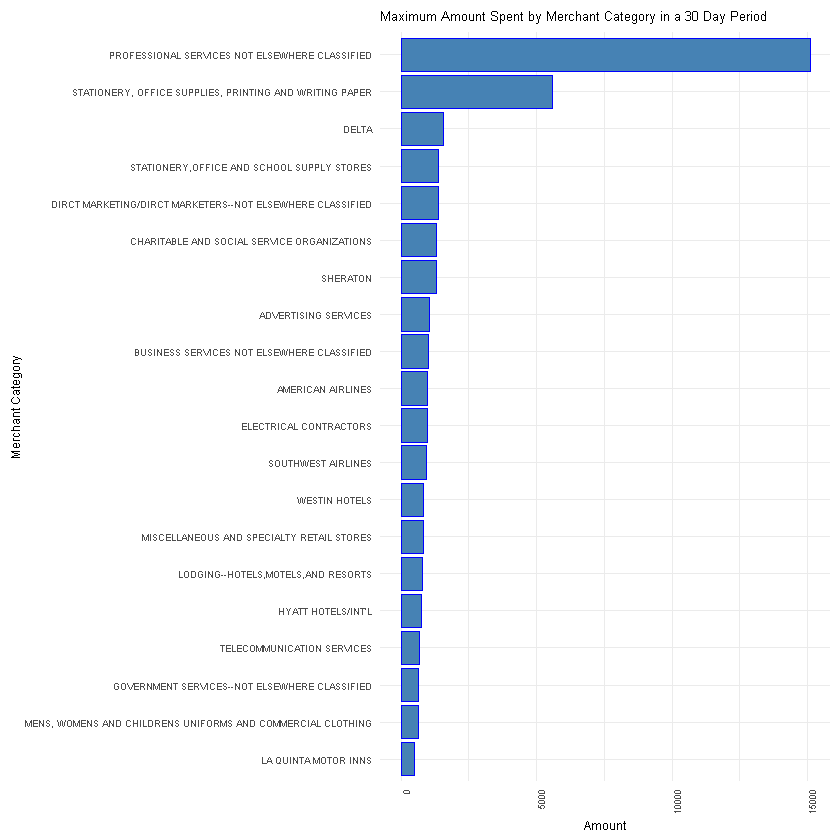

In [53]:
# Total Number of Transactions by Merchant Category over The Past 3 Months
sample_13<- sample_13[1:20,]

gg13 <- ggplot() + geom_bar(aes(reorder(sample_13$Merchant_Category,sample_13$max_trans_mer),sample_13$max_trans_mer),
                            stat = 'identity',color = "blue", fill = "steelblue") + 
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) + 
  labs(title = "Maximum Amount Spent by Merchant Category in a 30 Day Period",
        x = "Merchant Category",
        y = "Amount")+
  theme(plot.title = element_text(size = 8),
        text = element_text(size=7))

gg13 + coord_flip()

***Conclusion:*** When used with feature 12, this feature helps to detect if there are any large changes month-to-month for the transactions of an agency. By looking at the broader view of merchant category, it can help to predict if there are changes in spending pattern, regardless if vendors change.

### 14: Known Monthly Vendors for Agency (3+ transactions over past 3 months) <a class="anchor" id="feature14"></a>
This feature filters transactions by agency and then groups them by vendor and time. It then takes only transactions from the past 3 months before grouping by vendor and filtering the count to be 3 or larger.

In [54]:
sample14 = filter(ccard, Agency_Name == "UNIVERSITY OF OKLAHOMA")

In [55]:
monthly_vendors <- sample14 %>% group_by(Vendor, Year_Month) %>%
    summarise(total = sum(Amount)) %>%
    arrange(order(Vendor, -Year_Month))%>% ungroup()

In [56]:
last_3_months = filter(monthly_vendors, Year_Month >= 2014-04)

In [57]:
known_vendors = last_3_months %>%
                    group_by(Vendor) %>%
                    filter(n() >= 3)

In [58]:
distinct_known_vendors =  known_vendors %>% distinct(Vendor)

In [59]:
distinct_known_vendors[1:15,]

Vendor
003 CENTURYLINK MY ACCOUN
045 OBI 086
1000BULBS.COM
183 BUILD-OKLAHOMA
2XL CORP/CARE-GYMWIPES
37S BASECAMP 1932438
37S BASECAMP 2038751
37S BASECAMP 2052769
37S BASECAMP 2309927
37S HIGHRISE 1999665


***Conclusion***: This feature essentially creates a whitelist for transactions for a certain agency. As these transactions with these vendors occur at least monthly on average, they are most likely valid. This can help with predicting fraud by limiting the amount of data that is analyzed, provided that it mets other criteria provided by other features. 

### 15: Average of Total Number of Transactions for Known Vendors by Month<a class="anchor" id="feature15"></a>
This feature creates a sample set of data that filters by agency and transaction over the past 3 months to limit the amount of data being manipulated. It then groups by vendor and filters out vendors that have less than an average of 1 transaction a month. Next, it groups by agency and vendor, counts their number of transactions and then divides the count by 3 to find the average monthly number of transactions.

In [60]:
# Change Agency_Name to explore different organizations and pick any month as the count_ven has the same values per month
sample_15 <- time_by_agency%>%filter(Agency_Name == "DEPARTMENT OF TRANSPORTATION", month_yr >= "2014-04")
nrow(sample_15)

[1] 3863

In [61]:
known_vendors = sample_15 %>%
                    group_by(Vendor) %>%
                    filter(n() >= 3)
nrow(known_vendors)

[1] 2988

In [62]:
freq_monthly_vendor <- known_vendors%>% group_by(Agency_Name, Vendor) %>% 
                    # n()/3 to get number transactions per month as monthly vendor contains data of the lastest 3 months
                    summarise(count_ven = n()/3, count_ven = round(count_ven))%>%
                    arrange(desc(count_ven))%>% ungroup()

In [63]:
head(freq_monthly_vendor)

Agency_Name,Vendor,count_ven
DEPARTMENT OF TRANSPORTATION,WW GRAINGER,50
DEPARTMENT OF TRANSPORTATION,OK NATURAL GAS/TNB,49
DEPARTMENT OF TRANSPORTATION,FASTENAL COMPANY01,38
DEPARTMENT OF TRANSPORTATION,OG&E/USPAYMENTSBILLPAY,38
DEPARTMENT OF TRANSPORTATION,STAPLES,38
DEPARTMENT OF TRANSPORTATION,OREILLY AUTO 00002659,32


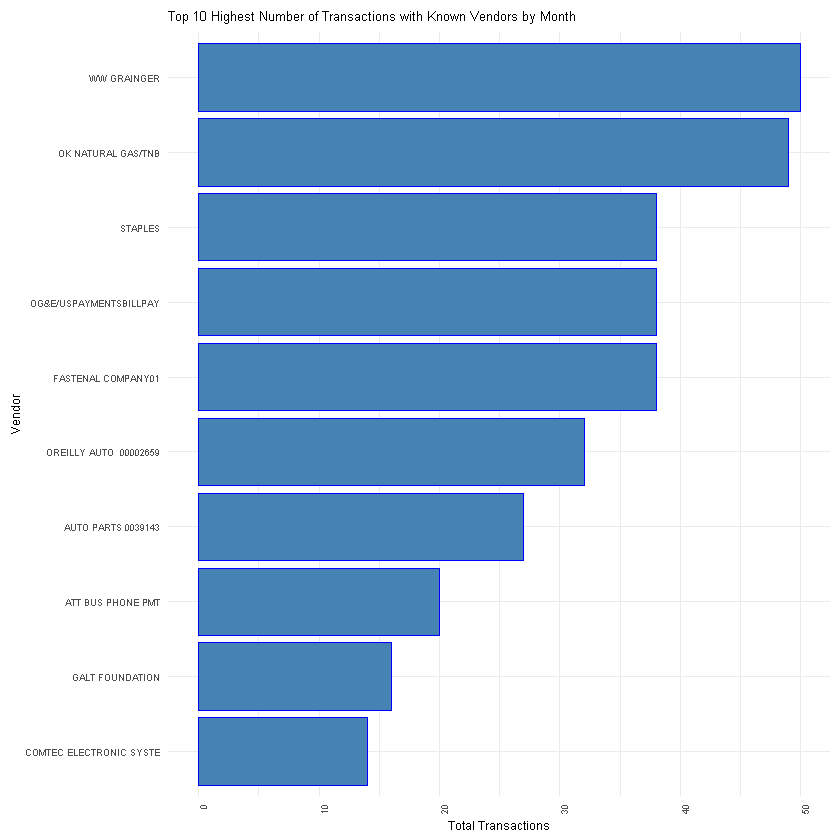

In [64]:
# Top 10 Highest Number of Transactions with Known Vendors by Month
freq_monthly_vendor<- freq_monthly_vendor[1:10,]

gg15 <- ggplot() + geom_bar(aes(reorder(freq_monthly_vendor$Vendor,
                                        freq_monthly_vendor$count_ven),
                                freq_monthly_vendor$count_ven),
                            stat = 'identity',color = "blue", fill = "steelblue") + 
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) + 
  labs(title = "Top 10 Highest Number of Transactions with Known Vendors by Month",
        x = "Vendor",
        y = "Total Transactions")+
  theme(plot.title = element_text(size = 8),
        text = element_text(size=7))

gg15 + coord_flip()

***Conclusion***: This feature helps to find vendors that have a sudden increase to the number of transactions they have per month. By using a rolling average over 3 months, it evens out the peaks to find a better representation of their number of transactions. These averages can then by compared to previous figures to help predict anomalies if large changes are noticed.

### 16: Rare vendor identify (1-2 transactions) over past 3 months<a class="anchor" id="feature16"></a>
This feature is similar to feature 14, but finds rare vendors instead of frequent ones. It creates a sample for transactions by a single agency before grouping them by vendor and date. It then filters for the last 3 months before grouping again to find vendors with 1 or 2 transactions.

In [65]:
rare_vendor <- ccard %>% group_by(Agency_Name, Vendor, Year_Month) %>%
    summarise(num_trans = n()) %>%
    filter(num_trans <= 2)%>%
    filter(Year_Month >= 201404)%>%
    arrange(order(Vendor, -Year_Month))%>% ungroup()

In [66]:
sample_16 <- rare_vendor%>%filter(Agency_Name == "UNIVERSITY OF OKLAHOMA")

In [67]:
distinct_new_vendors =  rare_vendor %>% distinct(Vendor)

distinct_new_vendors[1:15,]

Vendor
PAYPAL BLUETOAD
OREILLY AUTO 00003129
AMERICAN AI 0017446958078
JOURNYHSE SIMPSON
BEST WESTERN INN AND CONF
FAIRFIELD INN&SUITES MUSK
STANLEY SUPPLY & SVCS
SQ THE GOVERNOR'S CLUB 3
STAPLES DIRECT
DMI DELL K-12/GOVT


***Conclusion:*** This feature helps to find transactions with vendors that are more infrequent. By creating a list, it provides a lens on what transactions should be more carefully considered. If unusually large transactions are placed with these merchants, it can help predict if unusual activity is present which should be investigated further.

### 17: Maximum amount spent on rare vendor<a class="anchor" id="feature17"></a>
This feature groups by agency and vendor before finding the maximum charge for them. It then finds the unique vendors by filtering the number of transactions to be 1 or 2. Next, it creates a filter for a single agency to find the maximum value of the transactions by that vendor.

In [68]:
max_rare_vendor <- time_by_agency %>% group_by(Agency_Name, Vendor) %>%
    summarise(num_trans = n(),
             max = max(Amount)) %>%
    filter(num_trans <= 2)%>%
    arrange(order(Vendor))%>% ungroup()

In [69]:
sample_17 <- max_rare_vendor%>%filter(Agency_Name == "UNIVERSITY OF OKLAHOMA")%>%arrange(desc(max))

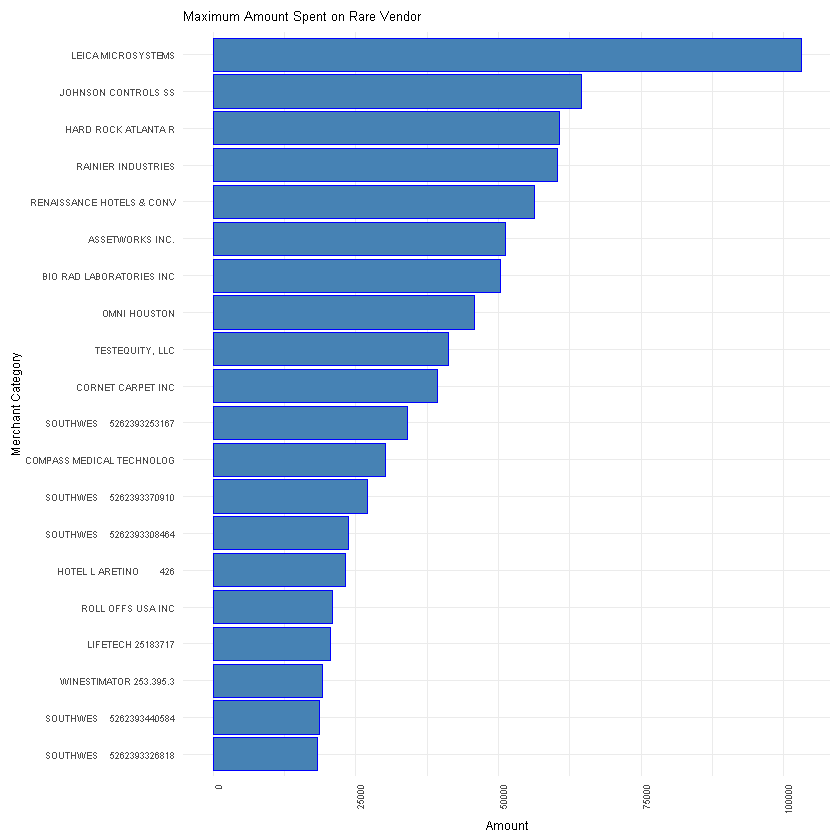

In [71]:
sample_17<- sample_17[1:20,]

gg17 <- ggplot() + geom_bar(aes(reorder(sample_17$Vendor,sample_17$max),sample_17$max),
                            stat = 'identity',color = "blue", fill = "steelblue") + 
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) + 
  labs(title = "Maximum Amount Spent on Rare Vendor",
        x = "Merchant Category",
        y = "Amount")+
  theme(plot.title = element_text(size = 8),
        text = element_text(size=7))

gg17 + coord_flip()

***Conclusion:*** This feature helps to see the values of unique vendors for an agency. By determining the maximum amount of the sales, it helps to identify big purchases which may need further investigation. Through highlighting these figures, it helps to predict anomalies by determing what transactions are unusual.

### 18: Number of Transactions by Unique Users for an Agency<a class="anchor" id="feature18"></a>
This feature groups transactions by date, cardholder name and agency name to count the number of transactions each person made in a day. It then filters by a certain agency, a certain period of time and also by the number of transactions if desired. The results ar ethen visualized in a list or by a chart.

In [72]:
count_daily_trans <- time_by_agency %>% 
        group_by(Transaction_Date,Cardholder_Last_Name, Cardholder_First_Initial,Agency_Name) %>%
        summarize(count_trans = n())%>%
        arrange((Transaction_Date),desc(count_trans)) %>% ungroup() 

In [73]:
# Change Agency_Name to explore different organizations
sample_18 <- count_daily_trans%>%filter(Agency_Name == "UNIVERSITY OF OKLAHOMA",
                                       Transaction_Date >= "2014-06-01",
                                       count_trans >= 2)

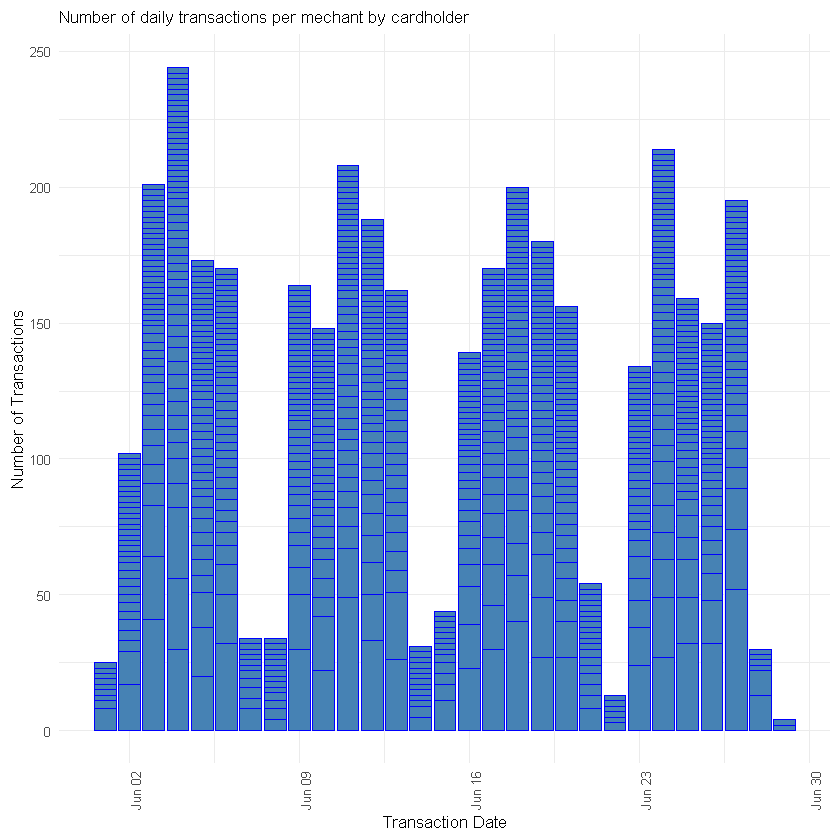

In [75]:
gg18 <- ggplot() + geom_bar(aes(sample_18$Transaction_Date,sample_18$count_trans), stat = 'identity',
                           color = "blue", fill = "steelblue") + 
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) + 
  labs(title = "Number of daily transactions per mechant by cardholder",
        x = "Transaction Date",
        y = "Number of Transactions")+
  theme(plot.title = element_text(size = 10),
        text = element_text(size=10))

gg18 #+ coord_flip()

***Conclusion***: This feature helps to see how many transactions are made by a single users on a certain date. Through comparing it against historical information, it can see if the number of transactions is exceedingly high and may indicate fraud. These figures can help predict fraud by noticing the change in the number of transactions a user makes and flags any large changes which may indicate suspicious behavior.

### 19: Month over Month Expense Changes<a class="anchor" id="feature19"></a>
This feature helps calculates the monthly expenses for an agency every month. It then compares them against the previous month and creates a month over month percentage change. These figures are then tracked and compared against the previous month.

In [76]:
# Total monthly expenses by agency
monthly_expenses <- time_by_agency %>% 
        group_by(Agency_Name, month_yr) %>%
        summarize(monthly_cost = sum(Amount))

In [77]:
# Calculate MoM 
monthly_report <- monthly_expenses %>%
      mutate(MoM = (monthly_cost - lag(monthly_cost)) / lag(monthly_cost))
monthly_report <- monthly_report %>%
    mutate(MoM = round(MoM * 100, 1))

In [78]:
# Change Agency_Name to explore different organizations
sample_19 <- monthly_report%>%filter(Agency_Name == "ATTORNEY GENERAL")

Warning message:
"Removed 1 rows containing missing values (position_stack)."

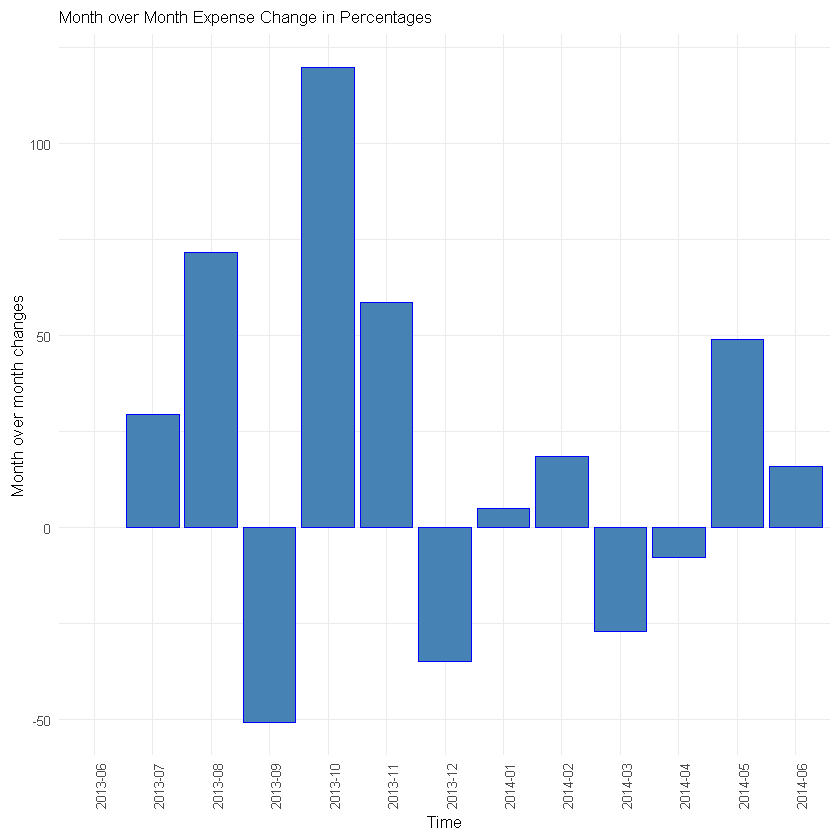

In [79]:
gg19 <- ggplot() + geom_bar(aes(sample_19$month_yr,sample_19$MoM), stat = 'identity',
                           color = "blue", fill = "steelblue") + 
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) + 
  labs(title = "Month over Month Expense Change in Percentages",
        x = "Time",
        y = "Month over month changes")+
  theme(plot.title = element_text(size = 10),
        text = element_text(size=10))

gg19 #+ coord_flip()

***Conclusion***: This feature helps to visualize how the charges an agency has change over time. If there are sudden increases or decreases, it may mean there is suspicious behaviour which should be monitored. Through tracking these percent changes, it helps to predict anomalies by highlighting how the transactions change over time.

### 20: Total Number of Transaction per Day for an agency <a class="anchor" id="feature20"></a>
This feature groups by agency and transaction date to count how many transactions are made per day. It then filters by agency and time by specifying a month to examine.

In [80]:
total_by_agency <- time_by_agency %>% group_by(Agency_Name, Transaction_Date) %>%
    summarise(total_trans = n()) %>%ungroup() 

In [81]:
# Change Agency_Name to explore different organizations
sample_20 <- total_by_agency%>%filter(Agency_Name == "ATTORNEY GENERAL",                                       
                                      Transaction_Date >= "2014-06-01")

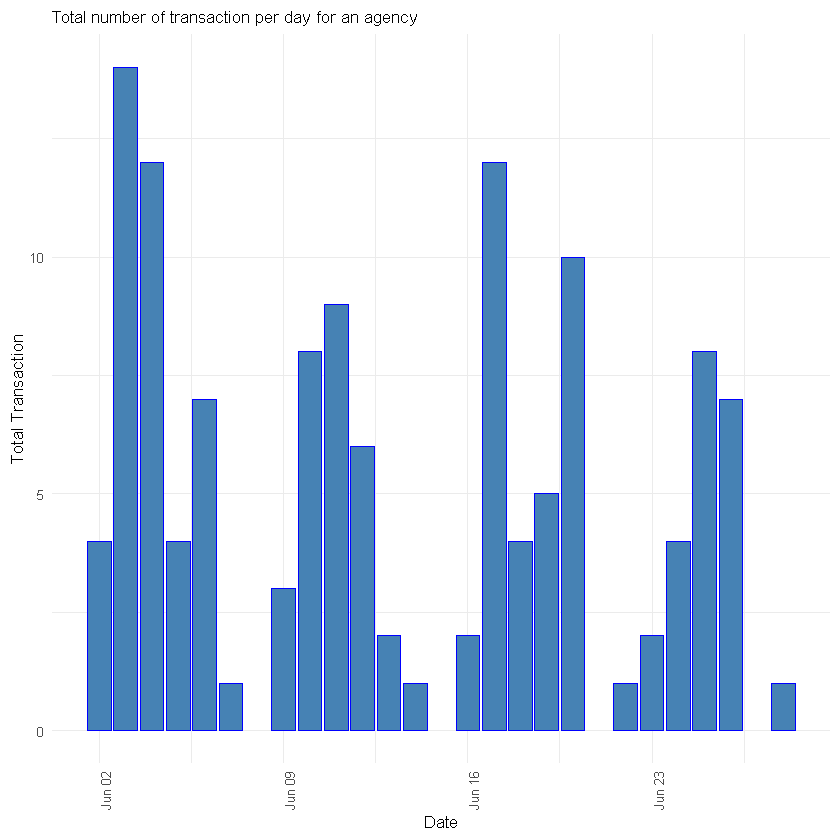

In [82]:
gg20 <- ggplot() + geom_bar(aes(sample_20$Transaction_Date,sample_20$total_trans), stat = 'identity',
                           color = "blue", fill = "steelblue") + 
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) + 
  labs(title = "Total number of transaction per day for an agency",
        x = "Date",
        y = "Total Transaction")+
  theme(plot.title = element_text(size = 10),
        text = element_text(size=10))

gg20 #+ coord_flip()

***Conclusion***: This feature helps to visualize how many transactions an agency has over time. Through comparing this chart and its figures against other days, it creates a pattern of spending which can be monitored. Also, it can help predict fraud by catching very high amounts of transactions in a day which are above the average which indicates suspicious behavior.